In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_intrusion = pd.read_csv('Security/Untitled Folder/Train_data.csv')

In [3]:
df_intrusion.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_intrusion.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

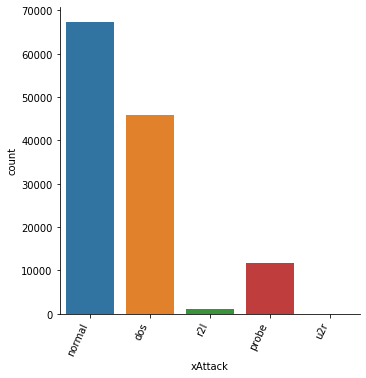

In [5]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='xAttack'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

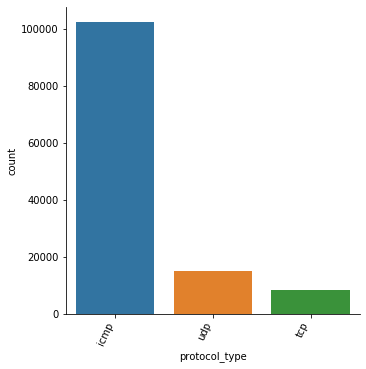

In [6]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='protocol_type'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

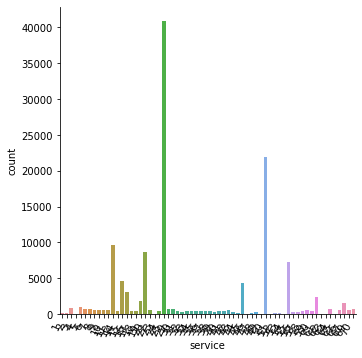

In [7]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='service'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

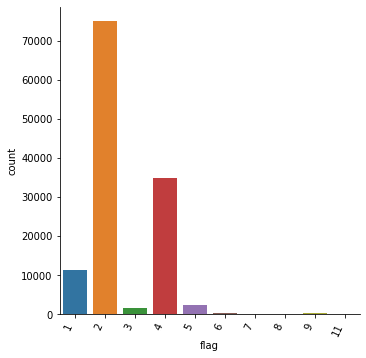

In [8]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='flag'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

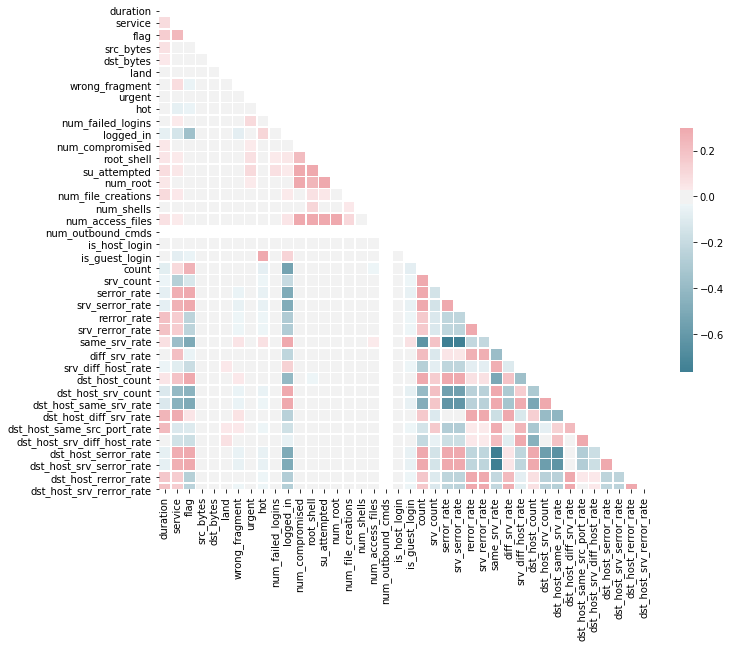

In [9]:
# Show the correlation between the various factors

import numpy as np

# Compute the correlation matrix
corr = df_intrusion.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
df_intrusion.protocol_type= [1 if each == "icmp"
                               else 2 if each == "udp" 
                               else 0 
                               for each in df_intrusion.protocol_type]

df_intrusion.xAttack= [1 if each == "dos"
                               else 2 if each == "probe" 
                               else 3 if each == "u2r"
                               else 4 if each == "r2l"
                               else 0 
                               for each in df_intrusion.xAttack]


In [12]:
df_intrusion_t = pd.read_csv('Security/Untitled Folder/test_data.csv')

In [13]:
df_intrusion_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10000 non-null  int64  
 1   duration                     10000 non-null  int64  
 2   protocol_type                10000 non-null  object 
 3   service                      10000 non-null  int64  
 4   flag                         10000 non-null  int64  
 5   src_bytes                    10000 non-null  int64  
 6   dst_bytes                    10000 non-null  int64  
 7   land                         10000 non-null  int64  
 8   wrong_fragment               10000 non-null  int64  
 9   urgent                       10000 non-null  int64  
 10  hot                          10000 non-null  int64  
 11  num_failed_logins            10000 non-null  int64  
 12  logged_in                    10000 non-null  int64  
 13  num_compromised  

In [14]:
df_intrusion_t=df_intrusion_t.drop(["Unnamed: 0"], axis=1)

In [15]:
df_intrusion_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   protocol_type                10000 non-null  object 
 2   service                      10000 non-null  int64  
 3   flag                         10000 non-null  int64  
 4   src_bytes                    10000 non-null  int64  
 5   dst_bytes                    10000 non-null  int64  
 6   land                         10000 non-null  int64  
 7   wrong_fragment               10000 non-null  int64  
 8   urgent                       10000 non-null  int64  
 9   hot                          10000 non-null  int64  
 10  num_failed_logins            10000 non-null  int64  
 11  logged_in                    10000 non-null  int64  
 12  num_compromised              10000 non-null  int64  
 13  root_shell       

In [16]:
df_intrusion_t['service'].unique()

array([25, 20, 29, 48, 50, 61, 45, 12, 55, 24, 19, 15, 32, 16, 58,  3, 52,
       69, 37, 34, 67, 10,  6, 64, 36,  7, 44,  5, 30, 14, 46,  8, 38, 22,
       39, 11, 17, 70, 56, 47, 41, 33, 59, 18, 42, 57, 54,  9, 53,  1, 40,
       31, 60, 43, 35, 63, 49, 66,  2], dtype=int64)

In [17]:
df_intrusion_t['xAttack'].unique()

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [18]:
df_intrusion_t.protocol_type= [1 if each == "icmp"
                               else 2 if each == "udp" 
                               else 0 
                               for each in df_intrusion_t.protocol_type]
df_intrusion_t.xAttack= [1 if each == "dos"
                               else 2 if each == "probe" 
                               else 3 if each == "u2r"
                               else 4 if each == "r2l"
                               else 0 
                               for each in df_intrusion_t.xAttack]


In [19]:
# Create two pandas arrays -- one for X and one for Y to get ready 
# for neural network

# convert the array into a numpy array
arr_train = df_intrusion.to_numpy()
arr_test = df_intrusion_t.to_numpy()

# separate X and Y
X_train = arr_train[:,0:41]
Y_train = arr_train[:,41]


# separate X and Y
X_test = arr_test[:,0:41]
Y_test = arr_test[:,41]

In [20]:
X_train

array([[0.0e+00, 1.0e+00, 2.0e+01, ..., 0.0e+00, 5.0e-02, 0.0e+00],
       [0.0e+00, 2.0e+00, 4.5e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 5.0e+01, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [0.0e+00, 1.0e+00, 5.5e+01, ..., 0.0e+00, 1.0e-02, 0.0e+00],
       [0.0e+00, 1.0e+00, 3.1e+01, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.0e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [21]:
Y_train

array([0., 0., 1., ..., 0., 1., 0.])

In [22]:
X_test

array([[  0.  ,   1.  ,  25.  , ...,   0.65,   0.32,   0.32],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   2.  ,  50.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       [282.  ,   1.  ,  20.  , ...,   0.  ,   0.82,   0.  ]])

In [23]:
Y_test

array([1., 0., 0., ..., 0., 0., 4.])

In [24]:
# Prepare Y values for one-hot encoding

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(X_train[:])
# encoded_X_train= encoder.transform(X_train)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_X_train = np_utils.to_categorical(encoded_X_train)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y_train= encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Y_test= encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_Test = np_utils.to_categorical(encoded_Y_test)



Using TensorFlow backend.
C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-pa

In [25]:
dummy_y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [26]:
Y_test

array([1., 0., 0., ..., 0., 0., 4.])

In [27]:
Y_train

array([0., 0., 1., ..., 0., 1., 0.])

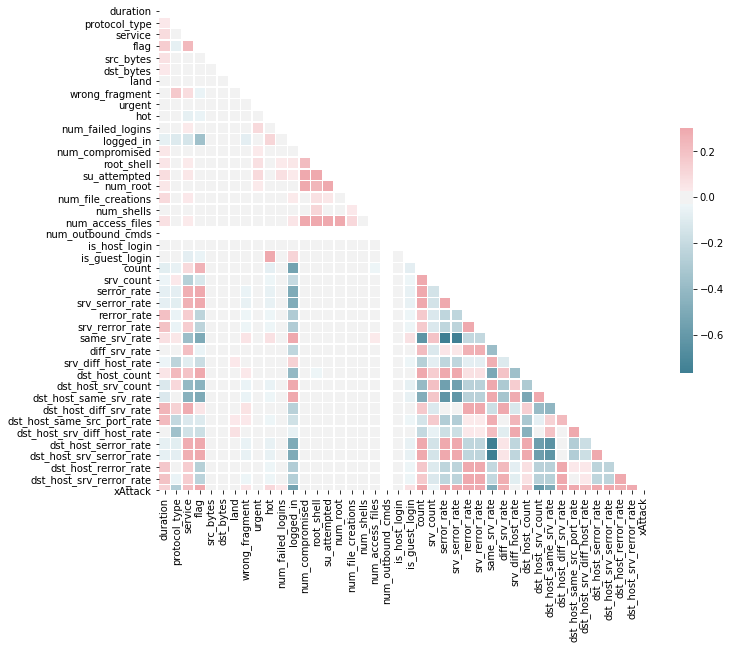

In [28]:
# Show the correlation between the various factors

import numpy as np

# Compute the correlation matrix
corr = df_intrusion.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
X_train.shape

(125973, 41)

In [30]:
Y_train.shape

(125973,)

In [31]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor



In [32]:
def create_InceptionV3():
    # Getting the InceptionV3 model 
    base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(125973,41))

    # Adding a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    #Adding a fully-connected dense layer
    x = Dense(512, activation='relu')(x)

    #Adding a logistic layer - We have 3 classes
    predictions = Dense(3, activation='softmax')(x)

    # The model we will train
    model = Model(inputs = base_model.input, outputs = predictions)

    # first: train only the top layers i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Show a summary of the model. Check the number of trainable parameters
    model.summary()

    # initialize our initial learning rate and # of epochs to train for
    INIT_LR = 0.01

    # compile the model using SGD as our optimizer and categorical
    # cross-entropy loss (you'll want to use binary_crossentropy
    # for 2-class classification)

    opt = SGD(lr=INIT_LR)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
                  metrics=["accuracy"])

    return model

In [33]:
model = create_InceptionV3()
EPOCHS = 75

# train the neural network
print("[INFO] training network...")
H = model.fit(X_train, dummy_y_train, validation_split=0.25,
              epochs=EPOCHS, batch_size=128)


ValueError: `input_shape` must be a tuple of three integers.

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(41, input_dim=41, activation='relu'))
model.add(Dense(41, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

In [35]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, dummy_y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 94479 samples, validate on 31494 samples
Epoch 1/50
94479/94479 [==============================] - 50s 533us/step - loss: 1.1056 - acc: 0.9120 - val_loss: 0.7928 - val_acc: 0.9445
Epoch 2/50
94479/94479 [==============================] - 17s 182us/step - loss: 0.7905 - acc: 0.9432 - val_loss: 0.7955 - val_acc: 0.9436
Epoch 3/50
94479/94479 [==============================] - 17s 183us/step - loss: 0.7720 - acc: 0.9471 - val_loss: 0.7918 - val_acc: 0.9427
Epoch 4/50
94479/94479 [==============================] - 17s 185us/step - loss: 0.7706 - acc: 0.9477 - val_loss: 0.7702 - val_acc: 0.9489
Epoch 5/50
94479/94479 [==============================] - 17s 182us/step - loss: 0.7636 - acc: 0.9486 - val_loss: 0.8260 - val_acc: 0.9446
Epoch 6/50
94479/94479 [==============================] - 18s 186us/step - loss: 0.5920 - acc: 0.9591 - val_loss: 0.5218 - val_acc: 0.9639
Epoch 7/50
94479/9447

In [43]:
from keras.utils import plot_model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model.png', show_shapes=True,)

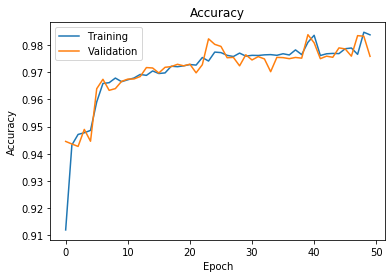

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')

plt.show()


In [45]:
print(history)

In [47]:
# evaluate the network
print("[INFO] evaluating network...")
print(classification_report(dummy_y_Test.argmax(axis=1),
                            predictions.argmax(axis=1)))


[INFO] evaluating network...


NameError: name 'classification_report' is not defined

In [48]:
predictions=model.predict(X_test, batch_size=32)
print(predictions)

[[9.996482e-01 3.806080e-16 3.518191e-04 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 ...
 [1.000000e+00 0.000000e+00 6.555489e-37 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [50]:
from sklearn.metrics import classification_report
# evaluate the network
print("[INFO] evaluating network...")
print(classification_report(dummy_y_Test.argmax(axis=1),
                            predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4329
           1       0.94      0.74      0.83      3332
           2       0.83      0.72      0.77      1053
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00      1199

    accuracy                           0.74     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.68      0.74      0.69     10000



C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(dummy_y_Test.argmax(axis=1), predictions.argmax(axis=1))
print(confusion_matrix)

[[4138   49  142    0    0]
 [1027 2144  161    0    0]
 [  34  113  906    0    0]
 [  40    0   47    0    0]
 [1083    0  116    0    0]]


In [225]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


# precision_recall_fscore_support(features_subset2, labels_subset2, average='macro')
# print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.accuracy_score(dummy_y_Test, predictions))
print(metrics.precision_score(dummy_y_Test, predictions))
print(metrics.recall_score(dummy_y_Test, predictions))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets